In [1]:
import assets.helper as b3
import assets.functions as run


In [2]:
import pandas as pd
import numpy as np
import os

import assets.graphs as g
import random
import requests

### QUOTES PRICES

In [ ]:
fund = run.sys_load_pkl(f'{b3.app_folder}/fund')
quotes = run.sys_load_pkl(f'{b3.app_folder}/quotes')


In [ ]:
fund.keys(), fund['BENS INDUSTRIAIS'].columns

In [ ]:
quotes.keys(), quotes['AERIS'].keys()

In [ ]:
df_preplot = {}
start_time = run.time.time()

for i, (setor, df_fund) in enumerate(fund.items()):
    df_fund = preprocess_data(df_fund)
    df_cd_conta = pivot_data(df_fund)

    df_unique = df_fund.drop_duplicates(subset=['DT_REFER', 'PREGAO']).drop(['CD_CONTA', 'DS_CONTA', 'VL_CONTA'], axis=1)
    df_premerged = pd.merge(df_unique, df_cd_conta, on=['DT_REFER', 'PREGAO'])
    df_resampled = resample_data(df_premerged)
    
    df_merged = merge_with_bigdata(df_resampled, bigdata)
    df_merged = df_merged.set_index('Date', drop=True)
    df_merged = df_merged.groupby('PREGAO', group_keys=False).apply(add_metrics)

    # Clean up the dataframe using the cleanup_dataframe function
    df_merged = cleanup_dataframe(df_merged)

    df_merged = add_metrics(df_merged)

    df_preplot[setor] = df_merged

    print(setor, run.sys_remaining_time(start_time, len(fund), i))


In [ ]:
# Define the path to the folder
company_folder = 'company'
folder_path = os.path.join(b3.app_folder, company_folder)

# Check if the folder does not exist
if not os.path.exists(folder_path):
    # Create the folder
    os.makedirs(folder_path)


In [ ]:
start_time = run.time.time()
for i, (setor, df) in enumerate(df_preplot.items()):
    companies = df['PREGAO'].unique()
    for i2, company in enumerate(companies):
        mask = df['PREGAO'] == company
        df_temp = df[mask]
        try:
            df_temp = run.sys_save_pkl(df_temp, f'{b3.app_folder}/{company_folder}/{company}')
        except Exception as e:
            pass
    print(setor, run.sys_remaining_time(start_time, len(df_preplot), i))


In [ ]:
mask = df_preplot['BENS INDUSTRIAIS']['TICKER'] == 'AERI3'
df_preplot['BENS INDUSTRIAIS'][mask]

### DASH

In [ ]:
company = 'AZEVEDO'
df = run.sys_load_pkl(f'{b3.app_folder}/{b3.company_folder}/{company}')
tickers = df['TICKER'].unique()
# df.columns.to_list()

In [ ]:
df['03.11 - Lucro Líquido']
df['14.04.01 - ROE (Resultado por Patrimônio)']
df['03.01 - Receita Bruta']
df['06.01 - Caixa das Operações']





In [ ]:
graphs = g.construct_graphs(df)
graphs.keys()

In [ ]:
import assets.lines
lines = assets.lines.report
groups = set(entry['title'][:2] for entry in lines)
groups

In [ ]:
for g, (group_key, group) in enumerate(graphs.items()):
    status = True if g == 0 else False
    plots = []
    for l, (line_key, line) in enumerate(group.items()):
        for p, (plot_key, plot_info) in enumerate(line.items()):
            for ticker in df['TICKER'].unique():
                df_ticker = df[df['TICKER'] == ticker]
                if not df.empty:
                    print(group[0][0]['info']['title'])
                    print(line[0]['info']['title'])
                    print(plot_info['info']['title'])
                    run.plot_tweak(plot_info, df_ticker).show();

In [ ]:
for ticker in tickers:
    df = df[df['TICKER'] == ticker]
    print(ticker, len(df))

    if not df.empty:
        for g, (group_key, group) in enumerate(merged_entries.items()):
            status = True if g == 0 else False
            plots = []
            for l, (line_key, line) in enumerate(group.items()):
                for p, (plot_key, plot_info) in enumerate(line.items()):
                    print(ticker)
                    run.plot_tweak(plot_info, df).show();

In [ ]:
fund = run.load_database()


In [ ]:
setores = []
for setor, df in fund.items():
    columns=['SETOR', 'SUBSETOR', 'SEGMENTO', 'PREGAO']
    setores.append(df[columns].drop_duplicates())
    print(setor)
sss = pd.concat(setores)
sss = sss.applymap(run.clean_text)

sss = run.sys_save_pkl(sss, f'{b3.app_folder}/sss')

In [ ]:
sss

In [ ]:
mask = sss['SUBSETOR'] == 'MATERIAL DE TRANSPORTE'
sss[mask]

#### Playground


In [ ]:
company_list = run.sys_load_pkl('company_list')
company_list

In [ ]:
listagem_siglas = ['NM', 'N1', 'N2', 'MA', 'M2', 'MB', 'DR1', 'DR2', 'DR3', 'DRE', 'DRN']
listagem_extenso = ['Novo Mercado', 'Nível 1 de Governança Corporativa', 'Nível 2 de Governança Corporativa', 'Bovespa Mais', 'Bovespa Mais Nível 2', 'Organização Tradicional OTC', 'BDR Nível 1', 'BDR Nível 2', 'BDR Nível 3', 'BDR ETF', 'BDR Não Patrocinado']
list_dict = dict(zip(listagem_siglas, listagem_extenso))
list_dict

#### Merge and update


In [ ]:
driver, wait = run.sys_load_browser()
url = 'https://sistemaswebb3-listados.b3.com.br/listedCompaniesPage/search?language=pt-br' 



In [ ]:
b3_cols = b3.cols_b3_companies + b3.col_b3_companies_extra_columns
companies__local = run.sys_read_or_create_dataframe('company', b3_cols).fillna('')
b3_companies_tickers = run.sys_load_pkl('b3_companies_tickers')

b3_companies_tickers = run.get_b3_tickers(driver, wait, url)
for col in b3_cols:
    if col not in b3_companies_tickers.columns:
        b3_companies_tickers[col] = ''
b3_companies_tickers = b3_companies_tickers[b3_cols]
# b3_companies_tickers = sys_save_pkl(b3_companies_tickers, 'b3_companies_tickers')

key_columns = ['ticker', 'company_name']
len(b3_companies_tickers), len(companies__local)

In [ ]:
merged = pd.merge(companies__local, b3_companies_tickers[:], how='outer', on=key_columns, indicator=True)

update_strict = merged[merged['_merge'] == 'right_only'][key_columns] # only companies new in web
update_broad = merged[merged['_merge'] != 'left_only'][key_columns] # all companies from web
updated = update_strict

len(update_broad), len(update_strict)

In [ ]:
key_columns = ['company_name', 'ticker']
b3_cols = b3.cols_b3_companies + b3.col_b3_companies_extra_columns
b3_cols_float = ['Capital Social']
b3_str_cols = [col for col in b3_cols if col not in  b3_cols_float]
col_types = {col: 'float' if col in b3_cols_float else 'str' for col in b3_cols}


In [ ]:
driver.get(b3.url)
# time.sleep(1)

size = len(updated)
# Iterate through the new companies to extract detailed information
new_companies = []
start_time = run.time.time()
for i, (index, row) in enumerate(updated.iterrows()):
    driver.get(b3.url)
    new_company = run.b3_get_company_info(row, driver, wait)
    new_company = pd.DataFrame([new_company], columns=b3_cols).astype(col_types)
    new_company['Capital Social'] = new_company['Capital Social'].replace(np.nan, 0.0)
    new_company = new_company.replace('nan', '')
    new_company['Capital Social'] = pd.to_numeric(new_company['Capital Social'], errors='coerce').astype('float')

    try:
        if not new_company.empty:
            cnpj = new_company['cnpj'][0]
            url = f'https://cnpj.biz/{cnpj}'
            response = requests.get(url, headers={"User-Agent": random.choice(b3.USER_AGENTS)})
            extra = run.b3_get_company_extra_cnpj_info(response)
            extra = pd.DataFrame([extra], columns=b3_cols).fillna('')
            extra = extra.astype(col_types)
        else:
            extra = pd.DataFrame([], columns=b3_cols)

    except Exception as e:
        pass
    extra = extra.reset_index(drop=True)
    new_company = pd.merge(new_company[b3.cols_b3_companies], extra[b3.col_b3_companies_extra_columns], left_on='cnpj', right_on='CNPJ', how='outer').fillna('').reset_index(drop=True)
    new_companies.append(new_company)
    
    print(run.sys_remaining_time(start_time, size, i), row['ticker'], row['company_name'])

    if (size-i-1) % (b3.bin_size/10) == 0:
        temp = pd.concat(new_companies).reset_index(drop=True)
        temp['Capital Social'] = pd.to_numeric(temp['Capital Social'], errors='coerce').astype('float')
        temp['Capital Social'] = temp['Capital Social'].replace(np.nan, 0.0)
        temp = pd.merge(companies__local, temp, on=b3_cols, how='outer', indicator=False).fillna('').drop_duplicates(subset=key_columns, keep='last').reset_index(drop=True)
        temp = sys_save_and_pickle(temp, 'company')


In [ ]:
temp

In [ ]:
for col in b3_cols:
    d1 = new_company[col].dtype
    d2 = extra[col].dtype
    print(col, d1, d2)
    if d1 != d2:
        print(col, d1, d2)
    

In [ ]:
b3_cols

##### CVM GET CODE

In [ ]:
for i in range(0,1000+1):
    url = f'https://sistemaswebb3-listados.b3.com.br/listedCompaniesPage/main/{i}/ABCD/overview?language=pt-br'
    print(url)

##### Final Company Get

In [ ]:
companies__local = run.sys_read_or_create_dataframe('company', b3_cols)


In [ ]:
companies__local.columns

In [ ]:
mask = companies__local['Estado'] == ''
# mask &= companies__local['cnpj'] != ''
companies__local = companies__local[~mask]

In [ ]:
companies__local = run.sys_save_and_pickle(companies__local, 'companies__local')

### Playground

In [10]:
filename = 'acoes'
columns = ['Companhia', 'Trimestre', 'Ações ON', 'Ações PN', 'Ações ON em Tesouraria', 'Ações PN em Tesouraria', 'Unidade', 'URL']
acoes = run.sys_read_or_create_dataframe(filename, columns)
acoes.to_csv('acoes.csv')


acoes: total 33935 items


In [ ]:
filename = 'nsd_links'
cols_nsd = ['company', 'dri', 'dri2', 'dre', 'data', 'versao', 'auditor', 'auditor_rt', 'cancelamento', 'protocolo', 'envio', 'url', 'nsd']

nsd = run.sys_read_or_create_dataframe(filename, cols_nsd)
nsd.to_csv('nsd_links.csv')

<Axes: >

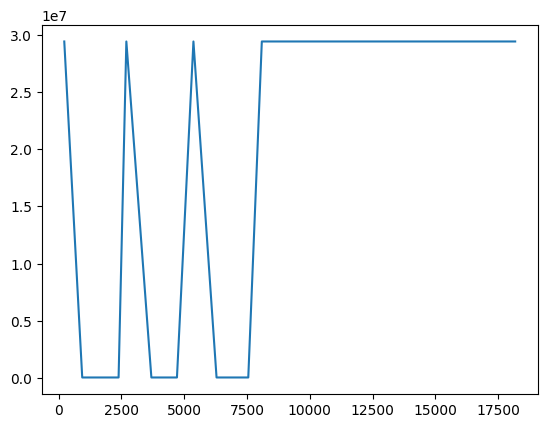

In [11]:
company = 'CIA FERRO LIGAS DA BAHIA FERBASA'
mask = acoes['Companhia'] == company
# Aplicando a máscara para obter um DataFrame separado para a companhia
df = acoes[mask].copy()
df['Ações ON'].plot()

2W ECOBANK SA
3A COMPANHIA SECURITIZADORA
3R PETROLEUM OLEO E GAS SA
521 PARTICIPACOES SA
524 PARTICIPACOES SA
ACO VERDE DO BRASIL SA
ACRUX SECURITIZADORA SA
ADVANCED DIGITAL HEALTH MEDICINA PREVENTIVA SA
AEGEA SANEAMENTO E PARTICIPACOES SA
AERIS IND E COM DE EQUIP PARA GER DE ENG SA
AES BRASIL ENERGIA SA
AES BRASIL OPERACOES SA
AES ELPA SA
AES TIETE ENERGIA SA
AES TIETE SA
AETATIS SECURITIZADORA SA
AFLUENTE GT DE ENERGIA ELETRICA SA
AFLUENTE TRANSMISSAO DE ENERGIA ELETRICA SA
AGASUS SA
AGRENCO LIMITED
AGROGALAXY PARTICIPACOES SA
AGUAS DE TERESINA SANEAMENTO SPE SA
AGUAS DO RIO 1 SPE SA
AGUAS DO RIO 4 SPE SA
AGUAS DO SERTAO SA
AGUAS GUARIROBA SA
AGV HOLDING SA
ALFA HOLDINGS SA
ALGAR TELECOM SA
ALIANSCE SHOPPING CENTERS SA
ALIUM PARTICIPACOES SA
ALLIANCA SAUDE E PARTICIPACOES SA
ALLIED TECNOLOGIA SA
ALLIS PARTICIPACOES SA
ALLOS SA
ALLPARK EMPREENDIMENTOS PARTICIPACOES E SERVICOS SA
ALMACENES EXITO SA
ALMEIDA JUNIOR SHOPPING CENTERS SA
ALPARGATAS SA
ALPER CONSULTORIA E CORRETORA DE SEGUR

<Axes: >

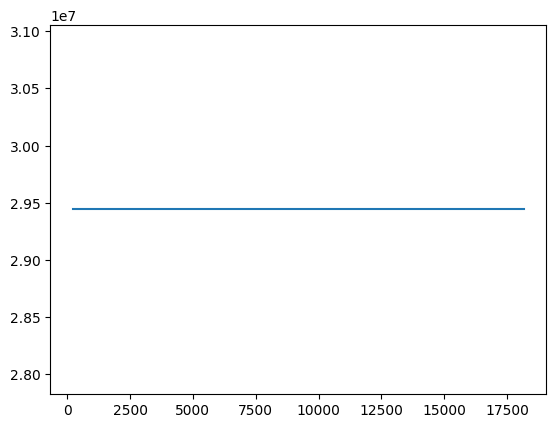

In [15]:
company = 'CIA FERRO LIGAS DA BAHIA FERBASA'
mask = acoes['Companhia'] == company
# Aplicando a máscara para obter um DataFrame separado para a companhia
df = acoes[mask].copy()
df['Ações ON'].plot()

In [ ]:
def identify_lower_anomalies(df, column_name, threshold=0.1):
    # Preparando os dados
    time_series = df[column_name].values.reshape(-1, 1)
    # Determinando o valor de referência (máximo)
    max_value = df[column_name].max()

    # Criando o modelo LOF
    lof = LocalOutlierFactor(n_neighbors=9, algorithm='auto', metric='euclidean')

    # Calculando o LOF para a série temporal
    lof_values = lof.fit_predict(time_series)
    lof_scores = lof.negative_outlier_factor_

    # Identificando os índices dos outliers (anomalias)
    outlier_indices = np.where(lof_values == -1)[0]

    # Filtrando os outliers que estão significativamente abaixo do valor máximo
    outliers = [index for index in outlier_indices if time_series[index] > max_value * threshold]

    return outliers

# Aplicando a função para 'Ações ON'
outliers = identify_lower_anomalies(df, 'Ações ON')

# Exibindo os resultados
print("Anomalias significativamente maiores em Ações ON:", outliers)


In [ ]:
on = df['Ações ON'].reset_index()
on

In [ ]:
import math

In [ ]:
def adjust_values_considering_previous(data, order_of_magnitude):
    adjusted_data = data.copy()
    previous_value = adjusted_data.iloc[0]

    for i in range(1, len(adjusted_data)):
        current_value = adjusted_data.iloc[i]

        # Verifica se o valor atual é aproximadamente 1000 vezes menor que o anterior
        ratio = previous_value / current_value
        power = 10 ** 3
        tolerance = 0.8
        if power * (1-tolerance) <= ratio <= power * (1+tolerance):
            while current_value < order_of_magnitude:
                current_value *= 10

        adjusted_data.iloc[i] = current_value
        previous_value = current_value

        # Comparação "a posteriori" do primeiro valor com o segundo valor já ajustado
        if len(adjusted_data) > 1:
            first_value = adjusted_data.iloc[0]
            second_value = adjusted_data.iloc[1]
            ratio = first_value / second_value
            if power * (1-tolerance) <= ratio <= power * (1+tolerance):
                while first_value < order_of_magnitude:
                    first_value *= 10
            adjusted_data.iloc[0] = first_value

    return adjusted_data

# Aplicando a função para ajustar os valores
for dataseries in ['Ações ON']:
    max_value = df[dataseries].max()
    if max_value > 0:
        order_of_magnitude = 10 ** (int(math.log10(max_value)))
        df[dataseries] = adjust_values_considering_previous(df[dataseries], order_of_magnitude)
df[dataseries]

In [ ]:
company = 'MULTIPLUS SA'
mask = acoes['Companhia'] == company
df = acoes[mask].copy()

from scipy import stats


In [ ]:
counts = pd.DataFrame(acoes['Companhia'].value_counts())
for company in counts[counts['Companhia'] > 50].head(50).index:
    print(company)
    mask = acoes['Companhia'] == company
    df = acoes[mask].copy()
    print(df['Ações ON'])
    

In [ ]:
def calcular_moda_ordem_de_magnitude(data, index, n_neighbors=4):
    start_index = max(index - n_neighbors, 0)
    end_index = min(index + n_neighbors, len(data) - 1)
    vizinhos = data.iloc[start_index:end_index + 1]
    ordens_de_magnitude = vizinhos.apply(lambda x: int(math.log10(x)) if x > 0 else 0)
    return ordens_de_magnitude.mode()[0] if not ordens_de_magnitude.mode().empty else 0

def ajustar_valores_considerando_vizinhos(data):
    adjusted_data = data.copy()

    for i in range(len(adjusted_data)):
        current_value = adjusted_data.iloc[i]
        if current_value == 0 or pd.isna(current_value):
            continue

        ordem_de_magnitude_atual = int(math.log10(current_value)) if current_value > 0 else 0
        moda_anteriores = calcular_moda_ordem_de_magnitude(adjusted_data, i - 1, n_neighbors=5)
        moda_posteriores = calcular_moda_ordem_de_magnitude(adjusted_data, i + 1, n_neighbors=5)
        print(current_value, moda_anteriores, moda_posteriores )
        if moda_anteriores < moda_posteriores:
            # Mantém a ordem de magnitude do valor atual
            continue
        else:
            while ordem_de_magnitude_atual < moda_anteriores:
                current_value *= 10
                ordem_de_magnitude_atual = int(math.log10(current_value))

        adjusted_data.iloc[i] = current_value

    return adjusted_data

# Aplicando a função para ajustar os valores de 'Ações ON'
df['Ações ON'] = ajustar_valores_considerando_vizinhos(df['Ações ON'])
df['Ações ON']

In [ ]:
company = 'BCO DAYCOVAL SA'
mask = acoes['Companhia'] == company
df = acoes[mask].copy()

In [ ]:
df[['Ações ON', 'Unidade']]  # Exibir as primeiras linhas para verificar as mudanças


In [ ]:
# Definição da função para ajustar os valores das ações
def stock_values_units(row):
    if row['Unidade'] == 'MIL':
        row['Ações ON'] *= 1000
        row['Ações PN'] *= 1000
        row['Ações ON em Tesouraria'] *= 1000
        row['Ações PN em Tesouraria'] *= 1000
        row['Unidade'] = 'UNIDADE'
    return row

# Filtrar os dados da companhia específica e ordenar por trimestre
df = acoes[mask].copy()
df = df.sort_values(by='Trimestre')

# Aplicar a função para ajustar os valores das ações
df = df.apply(stock_values_units, axis=1)
df['Ações ON']

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

def calculate_order_of_magnitude(number):
    return np.floor(np.log10(abs(number)))

def detect_down_jumps(df, n_neighbors=4, threshold=1000, tolerance=0.1):
    # Calculando a ordem de magnitude para cada valor de 'Ações ON'
    magnitudes = df['Ações ON'].apply(calculate_order_of_magnitude)

    # Preparando os dados para o LOF
    magnitudes = magnitudes.to_frame()

    # Aplicando LOF
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, metric='manhattan')
    lof.fit(magnitudes)

    # Identificando valores atípicos
    outliers = lof.fit_predict(magnitudes) == -1

    # Identificando down jumps
    down_jumps = []
    for i in range(len(df)):
        if outliers[i]:
            # Verificando as mudanças na ordem de magnitude
            if i >= n_neighbors and i < len(df) - n_neighbors:
                prev_mode = magnitudes.iloc[i-n_neighbors:i].mode()[0]
                next_mode = magnitudes.iloc[i+1:i+n_neighbors+1].mode()[0]

                # Verificar se é um down jump conforme as regras especificadas
                if prev_mode > next_mode:
                    change = abs((df.iloc[i]['Ações ON'] - threshold) / threshold)
                    if change <= tolerance:
                        down_jumps.append(i)

    return down_jumps

# Exemplo de uso:
down_jumps_indices = detect_down_jumps(df)
print("Índices com down jumps detectados:", down_jumps_indices)
